In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df.shape

(1061, 7)

In [ ]:
df['owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [ ]:
df['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

# 1. What is the range of selling prices in the dataset ?

In [ ]:
df['selling_price'].describe()

,selling_price
count,1061.000000
mean,59638.151744
std,56304.291973
min,5000.000000
25%,28000.000000
50%,45000.000000
75%,70000.000000
max,760000.000000


In [ ]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


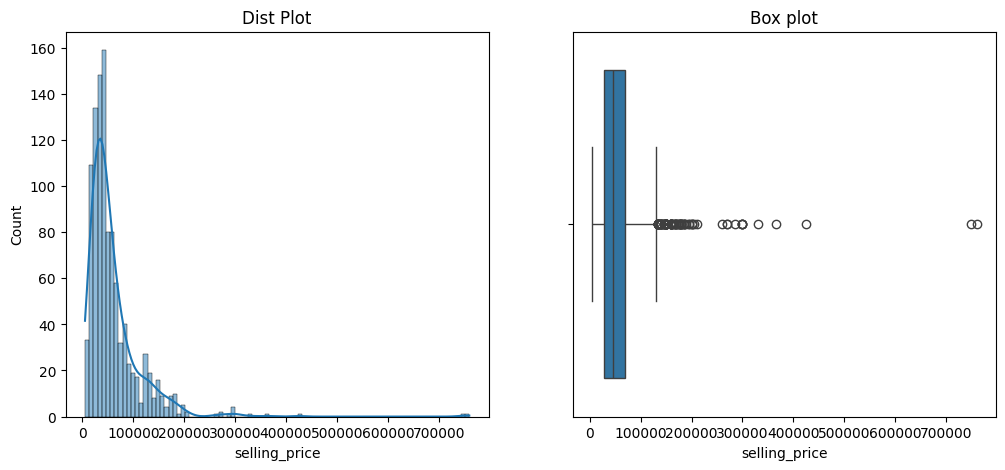

In [ ]:
#To check outliers>> distplot, boxplot

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['selling_price'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df, x = 'selling_price')
plt.title("Box plot")
plt.show()

<Axes: xlabel='seller_type', ylabel='selling_price'>

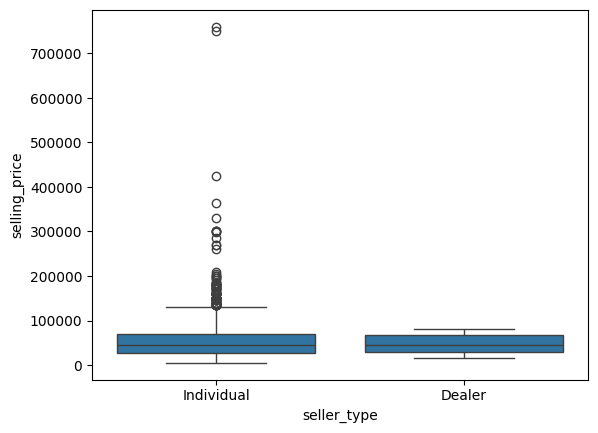

In [ ]:
sns.boxplot( x = 'seller_type', y = 'selling_price' , data = df )

In [ ]:
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [ ]:
df_filtered = df[(df.selling_price >= lower_fence) & (df.selling_price <= upper_fence)]

In [ ]:
df_filtered.shape

(974, 7)

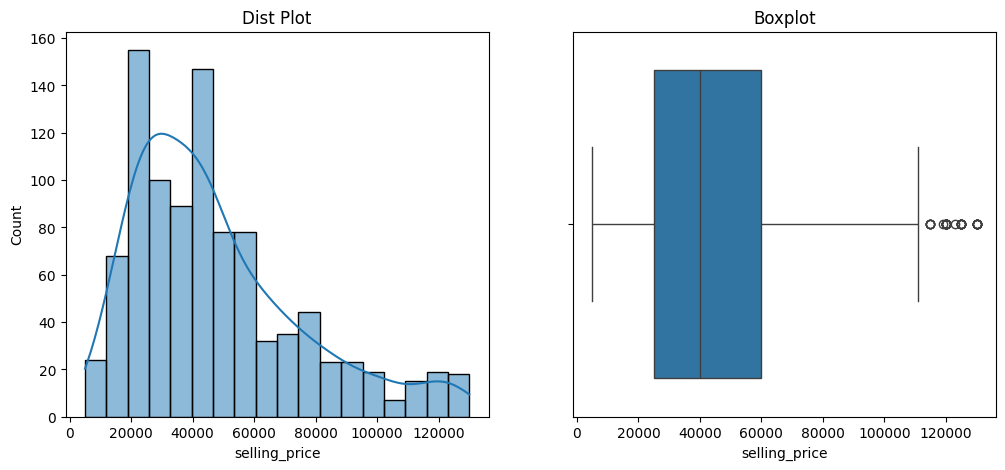

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['selling_price'],kde = True)
plt.title('Dist Plot')

plt.subplot(1,2,2)
sns.boxplot(data = df_filtered , x = 'selling_price'  )
plt.title('Boxplot')
plt.show()

In [ ]:
df_filtered.describe()

,selling_price,year,km_driven,ex_showroom_price
count,974.000000,974.000000,974.000000,582.000000
mean,47702.339836,2013.555441,36562.920945,75485.054983
std,27879.645378,4.260831,53261.151122,31008.207743
min,5000.000000,1988.000000,380.000000,30490.000000
25%,25000.000000,2011.000000,15000.000000,54605.000000
50%,40000.000000,2014.000000,27185.000000,67200.500000
75%,60000.000000,2017.000000,45000.000000,84751.000000
max,130000.000000,2019.000000,880000.000000,317934.000000


In [ ]:
df_filtered['selling_price'].describe()

,selling_price
count,974.000000
mean,47702.339836
std,27879.645378
min,5000.000000
25%,25000.000000
50%,40000.000000
75%,60000.000000
max,130000.000000


In [ ]:
Max = np.max(df_filtered['selling_price'])

In [ ]:
Max

130000

In [ ]:
Min = np.min(df_filtered['selling_price'])

In [ ]:
Min

5000

In [ ]:
Range = Max - Min

In [ ]:
Range

125000

# 2. What is the median selling price for bikes in the dataset ?

In [ ]:
df['selling_price'].median()

45000.0

# 3. What is the most common seller type ?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
df['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

In [ ]:
df['seller_type'] = df['seller_type'].map({'Individual' : 0 , 'Dealer' : 1})

In [ ]:
df['seller_type'].unique()

array([0, 1])

In [ ]:
df['seller_type'].median()

0.0

therefore Individual are common selling type .

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   int64  
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 58.1+ KB


#  4. How many bikes have driven more than 50,000 kilometers ?

In [ ]:
filtered_km = [Km for Km in df.km_driven if Km >= 50000]

In [ ]:
len(filtered_km)

207

In [ ]:
# 207 bikes have driven more than 50,000 kilometers

# 5 What is the average km_driven value for each ownership type ?

In [ ]:
#dropping the outlier

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [ ]:
df_filtered = df[(df.km_driven >= lower_fence) & (df.km_driven <= upper_fence)]

In [ ]:
df.shape

(1061, 7)

In [ ]:
df_filtered.shape

(1022, 7)

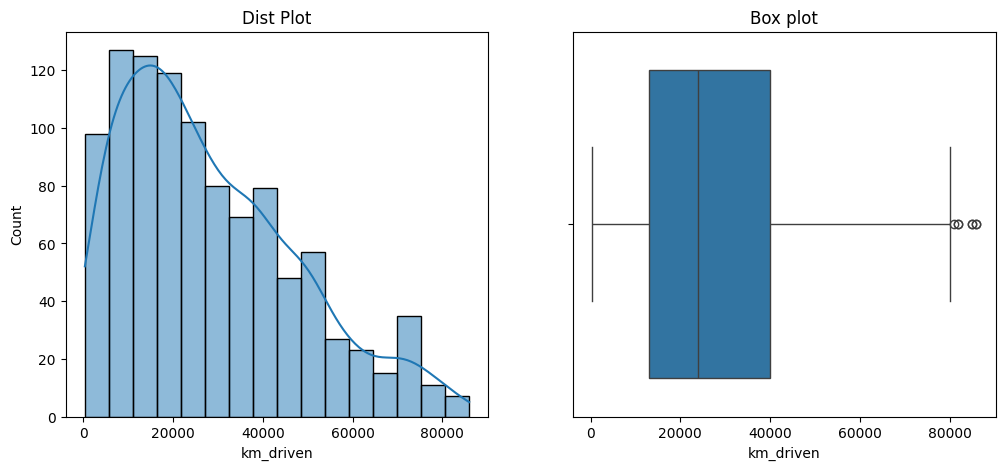

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['km_driven'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered, x = 'km_driven')
plt.title("Box plot")
plt.show()

In [ ]:
df_filtered['km_driven'].mean()

28203.415851272017

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   int64  
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 58.1+ KB


In [ ]:
df['owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [ ]:
km_per_owner = df.groupby('owner')['km_driven'].mean()


In [ ]:
km_per_owner

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
# Average when Outlier is removed

In [ ]:
df_filtered.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,27396.447309
2nd owner,33893.555556
3rd owner,33292.181818
4th owner,27250.000000


# 6. What proportion of bikes are from the year 2015 or older ?

# 7.  What is the trend of missing values across the dataset ?

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
# Trend

# 8. What is the highest ex_showroom_price recorded, and for which bike ?

In [ ]:
df['ex_showroom_price'].dtype

dtype('float64')

In [ ]:
df['ex_showroom_price'].describe()

,ex_showroom_price
count,6.260000e+02
mean,8.795871e+04
std,7.749659e+04
min,3.049000e+04
25%,5.485200e+04
50%,7.275250e+04
75%,8.703150e+04
max,1.278000e+06


In [ ]:
highest_ex_showroom_price_recorded = df[df['ex_showroom_price'] >= 1.278000e+06]

In [ ]:
highest_ex_showroom_price_recorded

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


# 9. What is the total number of bikes listed by each seller type ?

In [ ]:
seller_type	 = df['seller_type'].unique()

In [ ]:
seller_type

array(['Individual', 'Dealer'], dtype=object)

In [ ]:
Individual_seller_type = df[df.seller_type == 'Individual']

In [ ]:
len(Individual_seller_type)

1055

In [ ]:
Dealer_seller_type = df[df.seller_type == 'Dealer' ]

In [ ]:
len(Dealer_seller_type)

6

In [ ]:
# Individual_seller_type = 1055 , Dealer_seller_type = 6

# 10. What is the relationship between selling_price and km_driven for first-owner bikes ?

In [ ]:
type_owner = df['owner'].unique()

In [ ]:
type_owner

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [ ]:
df_1st_owner = df[df['owner'] == '1st owner']

In [ ]:
df_1st_owner

,name,selling_price,year,seller_type,owner,km_driven
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350
1,Honda Dio,45000,2017,Individual,1st owner,5650
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000
5,Honda CB Twister,18000,2010,Individual,1st owner,60000
...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000
1056,Activa 3g,17000,2010,Individual,1st owner,500000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000


<Axes: xlabel='selling_price', ylabel='km_driven'>

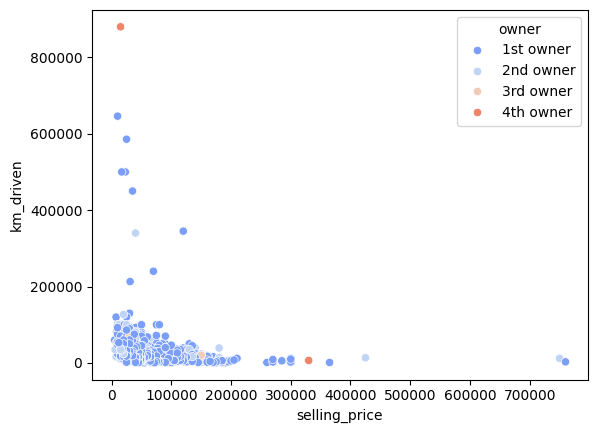

In [ ]:
sns.scatterplot(x = "selling_price", y = "km_driven", data=df,hue = 'owner' , palette = 'coolwarm')

<Axes: xlabel='selling_price', ylabel='km_driven'>

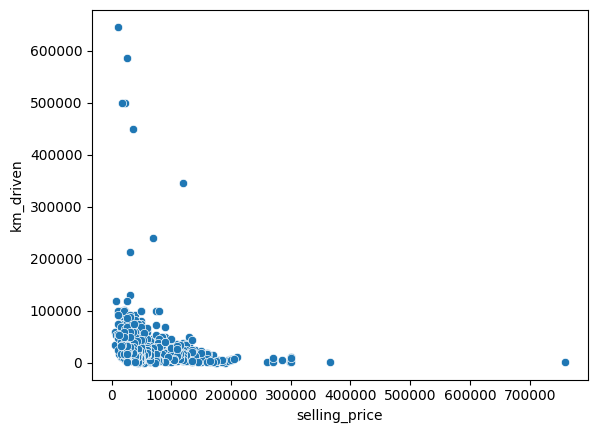

In [ ]:
sns.scatterplot(x = "selling_price", y = "km_driven", data = df_1st_owner , palette = 'coolwarm')

<Axes: xlabel='selling_price', ylabel='km_driven'>

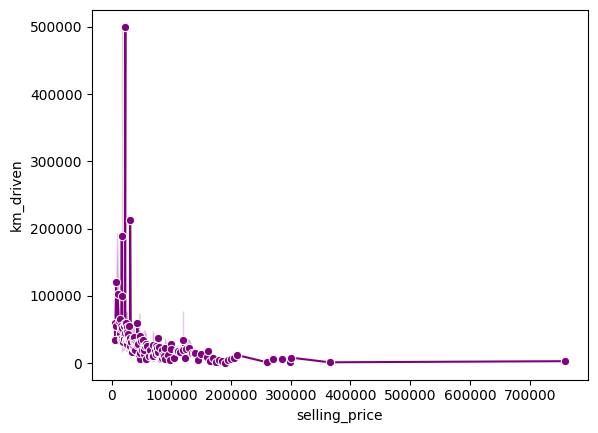

In [ ]:
sns.lineplot( x = 'selling_price' , y = 'km_driven' , data = df_1st_owner ,marker = 'o', color = 'purple')

# As the number of kilometers driven increases, the selling price decreases.

# 11. Identify and remove outliers in the km_driven column using the IQR method ?

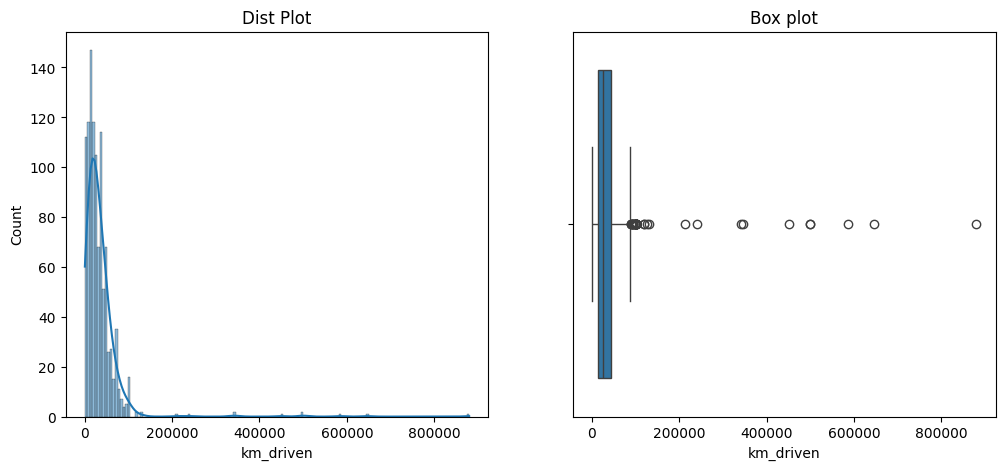

In [ ]:
#To check outliers>> distplot, boxplot

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['km_driven'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df, x = 'km_driven')
plt.title("Box plot")
plt.show()

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [ ]:
df_filtered = df[(df.km_driven >= lower_fence) & (df.km_driven <= upper_fence)]

In [ ]:
df_filtered

,name,selling_price,year,seller_type,owner,km_driven
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350
1,Honda Dio,45000,2017,Individual,1st owner,5650
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000
...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000


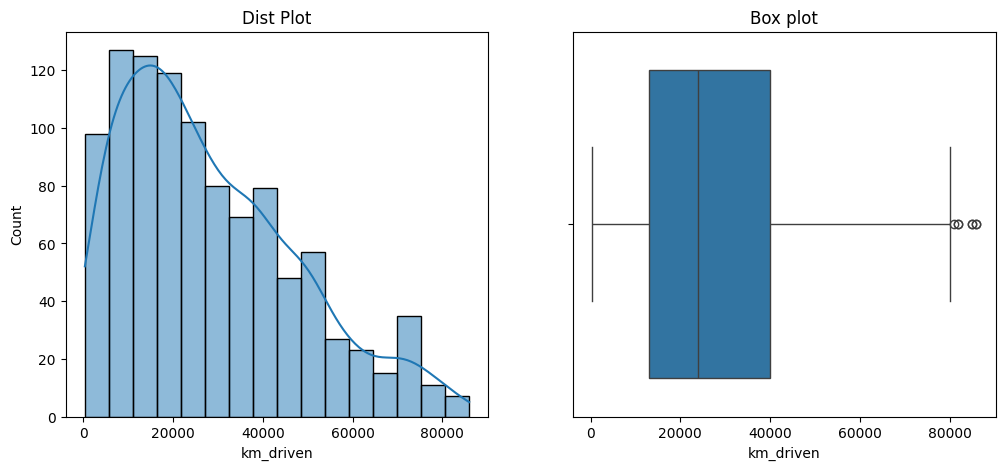

In [ ]:
# outliers>> distplot, boxplot

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['km_driven'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered, x = 'km_driven')
plt.title("Box plot")
plt.show()

# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

<Axes: xlabel='year', ylabel='selling_price'>

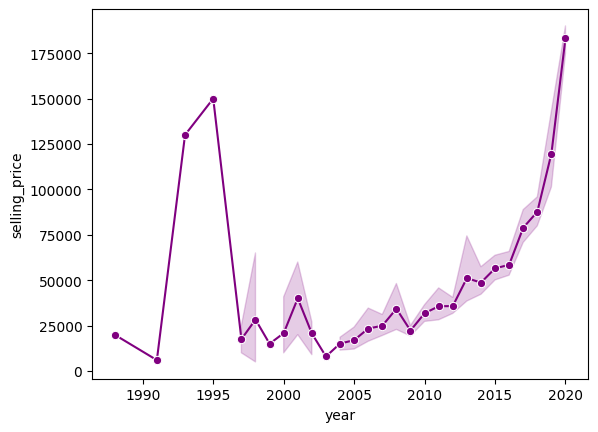

In [ ]:
sns.lineplot(x = 'year', y = 'selling_price', data=df, marker = 'o', color = 'purple')

<Axes: xlabel='year', ylabel='selling_price'>

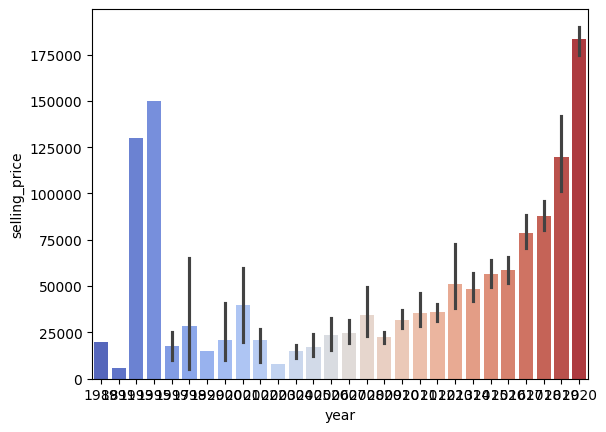

In [ ]:
sns.barplot(x = 'year', y = 'selling_price', data=df, palette = 'coolwarm')

# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year) ?

In [ ]:
df['bike_age'] = 2024 - df['year']

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,bike_age
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,5
1,Honda Dio,45000,2017,Individual,1st owner,5650,7
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,6
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,9
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,13
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,14
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,12
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,11
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,15


<Axes: xlabel='selling_price', ylabel='bike_age'>

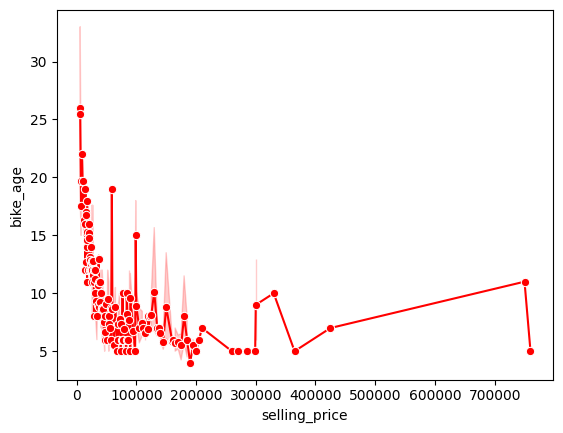

In [ ]:
sns.lineplot( x = 'selling_price' , y = 'bike_age' , marker = 'o' , data = df , color = 'r')


In [ ]:
# As the age of the bike increases, its selling price decreases

# 14. Which bike names are priced significantly above the average price for their manufacturing year ?

# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object"]

In [ ]:
cat_cols

['name', 'seller_type', 'owner']

In [ ]:
num_cols

['selling_price', 'year', 'km_driven', 'bike_age']

In [ ]:
import plotly.graph_objects as go

data_corr = df.corr(numeric_only = True)
fig = go.Figure(data =go.Heatmap(z = data_corr.selling_price,
                          x = data_corr.year,
                          y=data_corr.km_driven))
fig.show()

<Axes: >

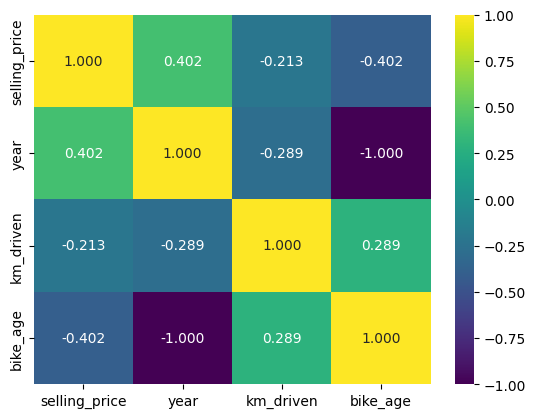

In [ ]:
num_cols = df.select_dtypes(include = 'number')
sns.heatmap(num_cols.corr(), cmap = 'viridis', annot = True, fmt = '.3f')